In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import json

In [2]:
data1 = """{"data":{"petition":{"id":"20569720","slug":"hollywood-boycott-aquaman-2-amber-heard","user":{"id":"1046163930","displayName":"Linda Medina","photo":{"id":"223235012","userSmall":{"url":"//assets.change.org/photos/4/tn/dg/XVTNdgVxunHNhHf-48x48-noPad.jpg?1584065456","processing":false}}},"organization":null,"updatesConnection":{"nodes":[{"__typename":"MilestonePetitionUpdate","id":"28061742","createdAt":"2020-11-13T11:05:08.000Z","signatureCount":5000},{"__typename":"MilestonePetitionUpdate","id":"28045863","createdAt":"2020-11-10T19:55:38.000Z","signatureCount":4000},{"__typename":"MilestonePetitionUpdate","id":"28035500","createdAt":"2020-11-09T06:13:16.000Z","signatureCount":3000},{"__typename":"MilestonePetitionUpdate","id":"28033749","createdAt":"2020-11-08T22:10:49.000Z","signatureCount":2500},{"__typename":"MilestonePetitionUpdate","id":"28032043","createdAt":"2020-11-08T16:44:31.000Z","signatureCount":2000},{"__typename":"MilestonePetitionUpdate","id":"28029893","createdAt":"2020-11-08T06:02:32.000Z","signatureCount":1500},{"__typename":"MilestonePetitionUpdate","id":"28027584","createdAt":"2020-11-07T19:45:19.000Z","signatureCount":1000},{"__typename":"MilestonePetitionUpdate","id":"28025681","createdAt":"2020-11-07T11:45:22.000Z","signatureCount":750},{"__typename":"MilestonePetitionUpdate","id":"27336169","createdAt":"2020-07-20T17:03:56.000Z","signatureCount":500},{"__typename":"MilestonePetitionUpdate","id":"26000964","createdAt":"2020-03-19T07:35:32.000Z","signatureCount":250}],"pageInfo":{"endCursor":"YXJyYXljb25uZWN0aW9uOjE5","hasNextPage":true}}}}}"""
data2 = """{"data":{"petition":{"id":"20569720","slug":"hollywood-boycott-aquaman-2-amber-heard","user":{"id":"1046163930","displayName":"Linda Medina","photo":{"id":"223235012","userSmall":{"url":"//assets.change.org/photos/4/tn/dg/XVTNdgVxunHNhHf-48x48-noPad.jpg?1584065456","processing":false}}},"organization":null,"updatesConnection":{"nodes":[{"__typename":"MilestonePetitionUpdate","id":"25938513","createdAt":"2020-03-15T15:28:10.000Z","signatureCount":200},{"__typename":"MilestonePetitionUpdate","id":"25906785","createdAt":"2020-03-13T00:43:13.000Z","signatureCount":100},{"__typename":"MilestonePetitionUpdate","id":"25902343","createdAt":"2020-03-12T19:34:11.000Z","signatureCount":50},{"__typename":"MilestonePetitionUpdate","id":"25854962","createdAt":"2020-03-06T18:54:00.000Z","signatureCount":25},{"__typename":"MilestonePetitionUpdate","id":"25828610","createdAt":"2020-03-02T05:16:53.000Z","signatureCount":10},{"__typename":"MilestonePetitionUpdate","id":"25826792","createdAt":"2020-03-01T20:06:39.000Z","signatureCount":5}],"pageInfo":{"endCursor":"YXJyYXljb25uZWN0aW9uOjI1","hasNextPage":false}}}}}"""
data3 = """{"data":{"petition":{"id":"20569720","slug":"hollywood-boycott-aquaman-2-amber-heard","user":{"id":"1046163930","displayName":"Linda Medina","photo":{"id":"223235012","userSmall":{"url":"//assets.change.org/photos/4/tn/dg/XVTNdgVxunHNhHf-48x48-noPad.jpg?1584065456","processing":false}}},"organization":null,"updatesConnection":{"nodes":[{"__typename":"MilestonePetitionUpdate","id":"28508927","createdAt":"2021-02-07T20:25:32.000Z","signatureCount":20000},{"__typename":"MilestonePetitionUpdate","id":"28198563","createdAt":"2020-12-10T15:50:37.000Z","signatureCount":17500},{"__typename":"MilestonePetitionUpdate","id":"28170901","createdAt":"2020-12-05T04:01:49.000Z","signatureCount":15000},{"__typename":"MilestonePetitionUpdate","id":"28149599","createdAt":"2020-12-01T14:03:12.000Z","signatureCount":12500},{"__typename":"MilestonePetitionUpdate","id":"28138098","createdAt":"2020-11-28T23:17:23.000Z","signatureCount":10000},{"__typename":"MilestonePetitionUpdate","id":"28137005","createdAt":"2020-11-28T18:24:35.000Z","signatureCount":9000},{"__typename":"MilestonePetitionUpdate","id":"28136111","createdAt":"2020-11-28T14:26:48.000Z","signatureCount":8000},{"__typename":"MilestonePetitionUpdate","id":"28135702","createdAt":"2020-11-28T12:04:24.000Z","signatureCount":7500},{"__typename":"MilestonePetitionUpdate","id":"28134877","createdAt":"2020-11-28T06:19:06.000Z","signatureCount":7000},{"__typename":"MilestonePetitionUpdate","id":"28099804","createdAt":"2020-11-21T00:28:35.000Z","signatureCount":6000}],"pageInfo":{"endCursor":"YXJyYXljb25uZWN0aW9uOjk=","hasNextPage":true}}}}}"""

cURL (todo -- automate):

```
curl 'https://www.change.org/api-proxy/graphql' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:85.0) Gecko/20100101 Firefox/85.0' -H 'Accept: application/json' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Referer: https://www.change.org/p/hollywood-boycott-aquaman-2-amber-heard' -H 'content-type: application/json' -H 'X-Requested-With: http-link' -H 'Origin: https://www.change.org' -H 'DNT: 1' -H 'Connection: keep-alive' -H 'Cookie: __cfruid=ee2ddbea68f4c74770b06e7638ef30df5a3e1a6a-1633451954; _change_session=31e3010ee8fa6c5a62309f622e93d138; _change_lang=%7B%22locale%22%3A%22en-US%22%2C%22countryCode%22%3A%22CH%22%7D; optimizelyEndUserId=oeu1633451961437r0.3816635559157925; G_ENABLED_IDPS=google; _change_id=5b5fa2e82b570c359e5fec1cf1fade1aa25579fd.1227904423.1633467225601' -H 'Sec-GPC: 1' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'TE: Trailers' --data-raw '{"operationName":"PetitionDetailsPagePetitionStats","variables":{"petitionId":"20569720","count":10,"types":["MILESTONE","STARTER","DM_RESPONSE","STAFF","FEATURED_NEWS"]},"query":"query PetitionDetailsPagePetitionStats($petitionId: ID!, $count: Int!, $types: [PetitionUpdateType!]!, $cursor: ID) {\n  petition: petitionById(id: $petitionId) {\n    id\n    slug\n    user {\n      id\n      displayName\n      photo {\n        id\n        userSmall {\n          url\n          processing\n        }\n      }\n    }\n    organization {\n      id\n      name\n      photo {\n        id\n        userSmall {\n          url\n          processing\n        }\n      }\n    }\n    updatesConnection: petitionUpdatesConnection(\n      types: $types\n      first: $count\n      after: $cursor\n    ) {\n      nodes {\n        __typename\n        id\n        createdAt\n        ... on MilestonePetitionUpdate {\n          signatureCount\n        }\n        ... on StarterPetitionUpdate {\n          title\n          description\n          ...MediaFields\n        }\n        ... on StaffPetitionUpdate {\n          title\n          description\n          ...MediaFields\n        }\n        ... on FeaturedNewsPetitionUpdate {\n          title\n          ...MediaFields\n        }\n        ... on DmResponsePetitionUpdate {\n          title\n          description\n          ...MediaFields\n          dmResponse {\n            id\n            decisionMaker {\n              id\n              displayName\n              photo {\n                id\n                userSmall {\n                  url\n                  processing\n                }\n              }\n            }\n          }\n        }\n      }\n      pageInfo {\n        endCursor\n        hasNextPage\n      }\n    }\n  }\n}\n\nfragment MediaFields on PetitionUpdateWithMedia {\n  photo {\n    id\n    petitionMedium {\n      url\n      processing\n    }\n  }\n  video {\n    photo {\n      id\n      petitionMedium {\n        url\n        processing\n      }\n    }\n  }\n  embeddedMedia {\n    providerName\n    photoUrl\n    description\n  }\n}\n"}'
```

In [13]:
def data_to_df(data1):
    arr = json.loads(data1)['data']['petition']['updatesConnection']['nodes']
    return pd.DataFrame(arr)

In [19]:
datas = [data1, data2, data3]
df = pd.concat(list(map(pd.DataFrame, map(data_to_df, datas))))

In [22]:
df = df.sort_values('signatureCount')

In [28]:
df['createdAt'] = pd.to_datetime(df.createdAt)

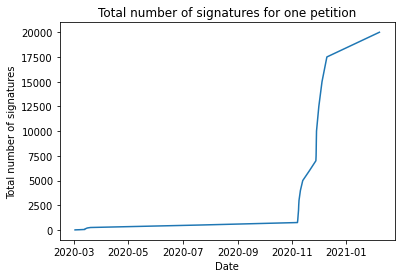

In [30]:
plt.title("Total number of signatures for one petition")
plt.xlabel("Date")
plt.ylabel("Total number of signatures")
plt.plot(df.createdAt, df.signatureCount)
plt.savefig("./figures/total_signatures_milestones.png", transparent=False,
            bbox_inches='tight')
plt.show()